In [ ]:
'''
1.	Collect data on monthly electricity consumption for the target region (city or country), as well as meteorological data from open sources.
2.	Preprocess the data, clean it, and convert it into a suitable format for analysis.
3.	Define features and target variable. Features can include factors such as time of day, day of the week, seasonality, temperature, humidity, 
and other relevant variables that affect electricity consumption.
4.	Conduct exploratory data analysis (EDA) to understand the distribution of the data and identify any trends or patterns.
5.	Build a correlation matrix to determine the significance of features.
6.	Split the dataset into training and test samples in the ratio of 80:20.
7.	Use machine learning algorithms to build regression models. Several algorithms can be used, such as linear regression (LinearRegression, Lasso, Ridge), 
k-nearest neighbors (KNeighborsRegressor), decision tree (DecisionTreeRegressor), random forest (RandomForestRegressor), support vector linear regression (LinearSVR), 
multilayer perceptron (MLPRegressor), extreme gradient boosting (XGBoost), and gradient boosting based on decision trees (CatBoost).
8.	Use cross-validation tools like GridSearchCV to select the best parameters for each model.
9.	Evaluate the performance of each model using quality metrics such as mean absolute percentage error (MAPE) and coefficient of determination (R^2score).
10.	Select the best-performing model and use it for prediction.
11.	Monitor the model's performance over time and update the model as needed.
'''

| Model                   | MAPE  | R2score |
|-------------------------|-------|---------|
| Linear Regression       | 10,72 | 0,45    |
| KNeighborsRegressor     | 10,00 | 0,45    |
| DecisionTreeRegressor   | 8,22  | 0,57    |
| Random Forest Regressor | 9,44  | 0,54    |
| LinearSVR               | 15,91 | –0,01   |
| MLPRegressor            | 14,93 | 0,05    |
| XGBRegressor            | 9,49  | 0,51    |
| CatBoostRegressor       | 11,88 | 0,11    |


In [2]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_percentage_error, r2_score


In [40]:
parent_path =  os.path.join(Path(os.getcwd()).parents[0], 'dataset')
file_name = 'dataset.csv'
directory = os.path.join(parent_path, file_name)

df = pd.read_csv(directory, sep='\t', index_col=0)
df.dropna(axis = 0, how ='any', inplace = True) 
df['consumption'] = pd.to_numeric(df['consumption'].str.replace(',', '.'))
df['temperature'] = pd.to_numeric(df['temperature'])
df['humidity'] = pd.to_numeric(df['humidity'])
df.index = pd.to_datetime(df.index, format='%Y_%m')

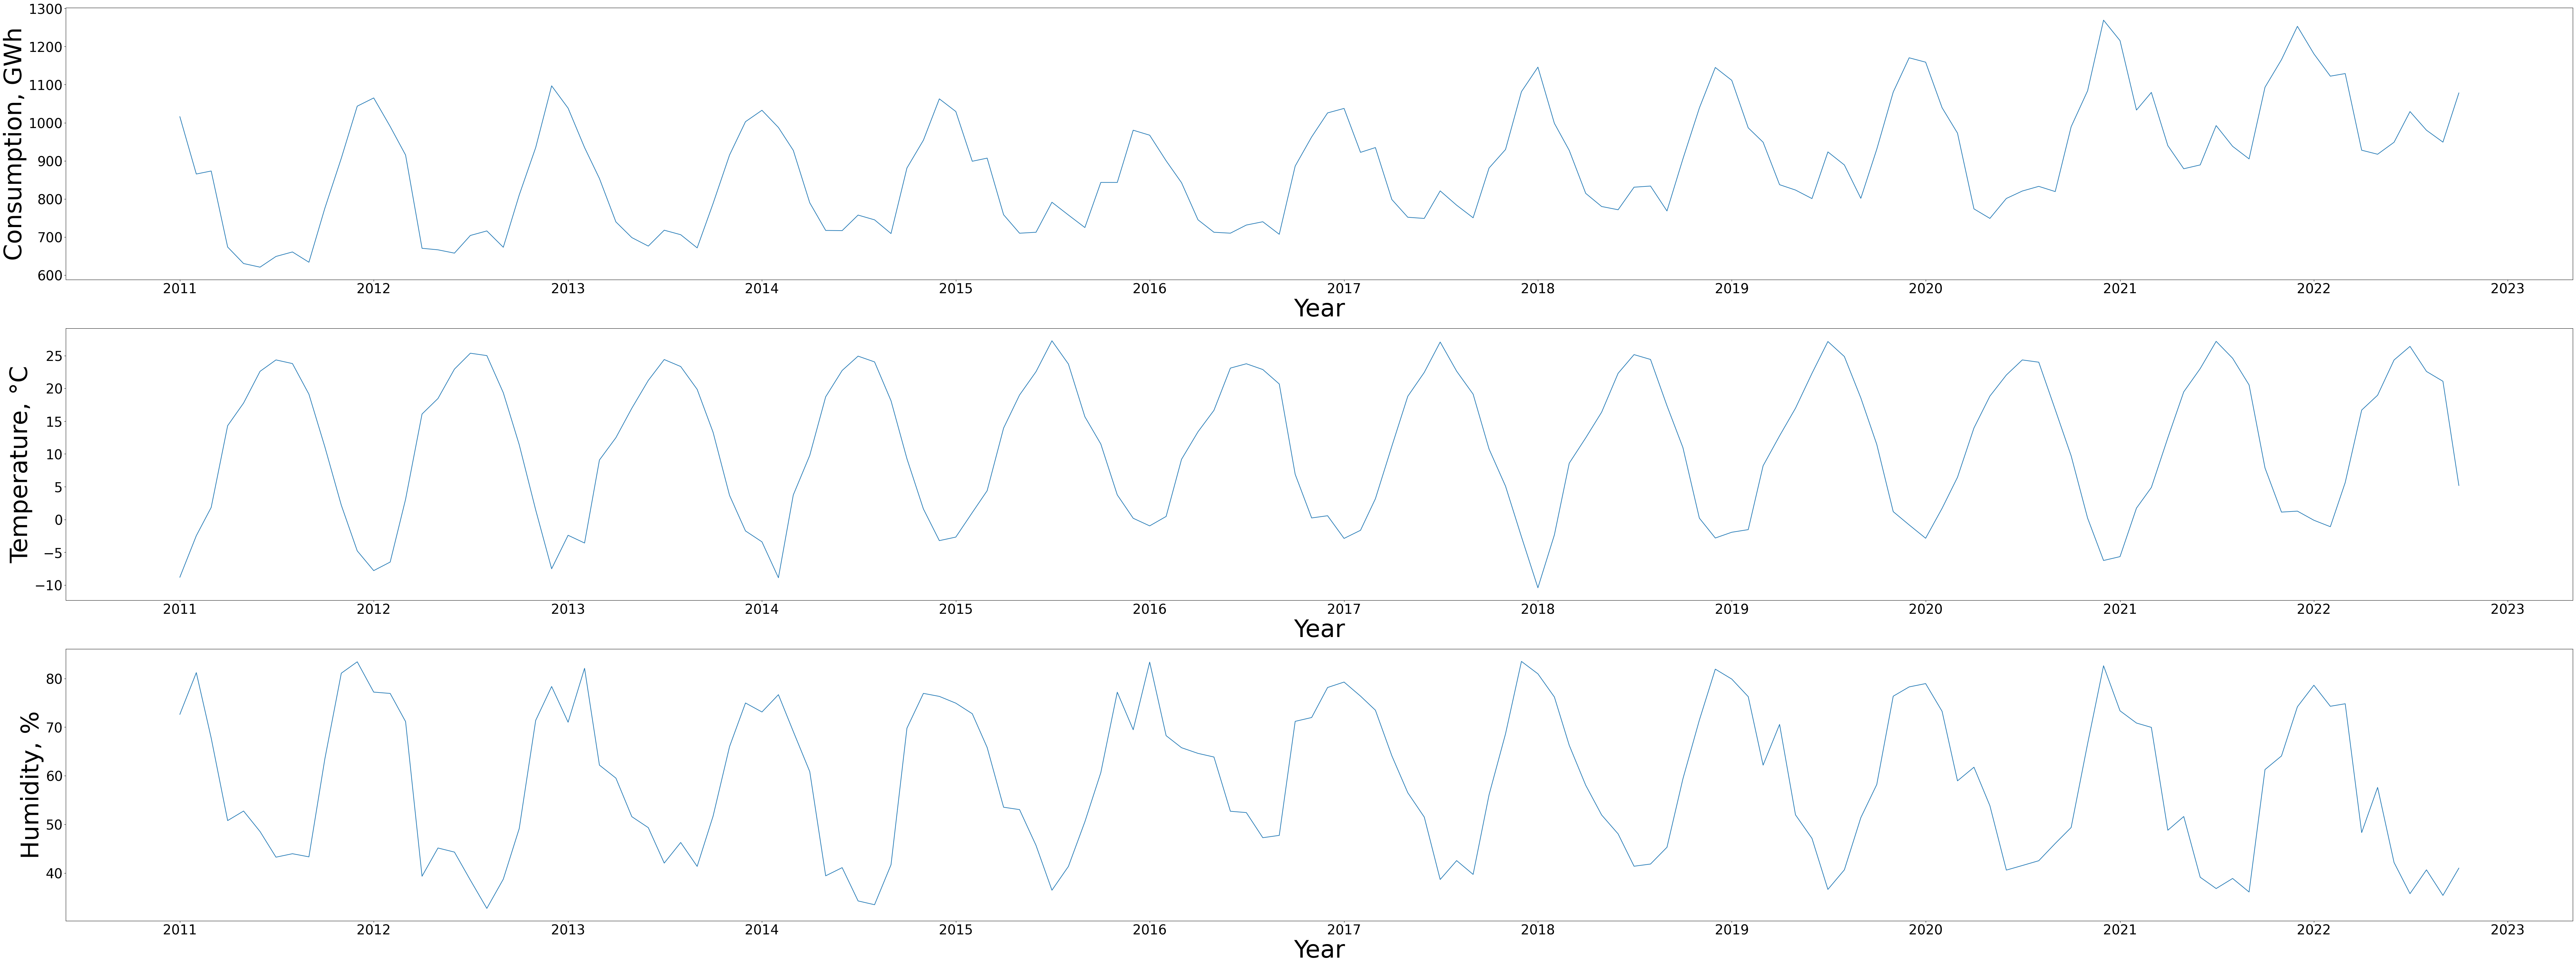

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(80, 30))


axs[0].plot(df.index, df['consumption'])
axs[0].set_ylabel('Consumption')
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[1].plot(df.index, df['temperature'])
axs[1].set_ylabel('Temperature')
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[2].plot(df.index, df['humidity'])
axs[2].set_ylabel('Humidity')
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplots_adjust(wspace=5, hspace=10)

for ax in axs.flatten():
    ax.tick_params(axis='both', labelsize=30)

axs[0].set_xlabel('Year', fontsize=54)
axs[0].set_ylabel('Consumption, GWh', fontsize=54)

axs[1].set_xlabel('Year', fontsize=54)
axs[1].set_ylabel('Temperature, °C', fontsize=54)

axs[2].set_xlabel('Year', fontsize=54)
axs[2].set_ylabel('Humidity, %', fontsize=54)


plt.tight_layout()
plt.show()

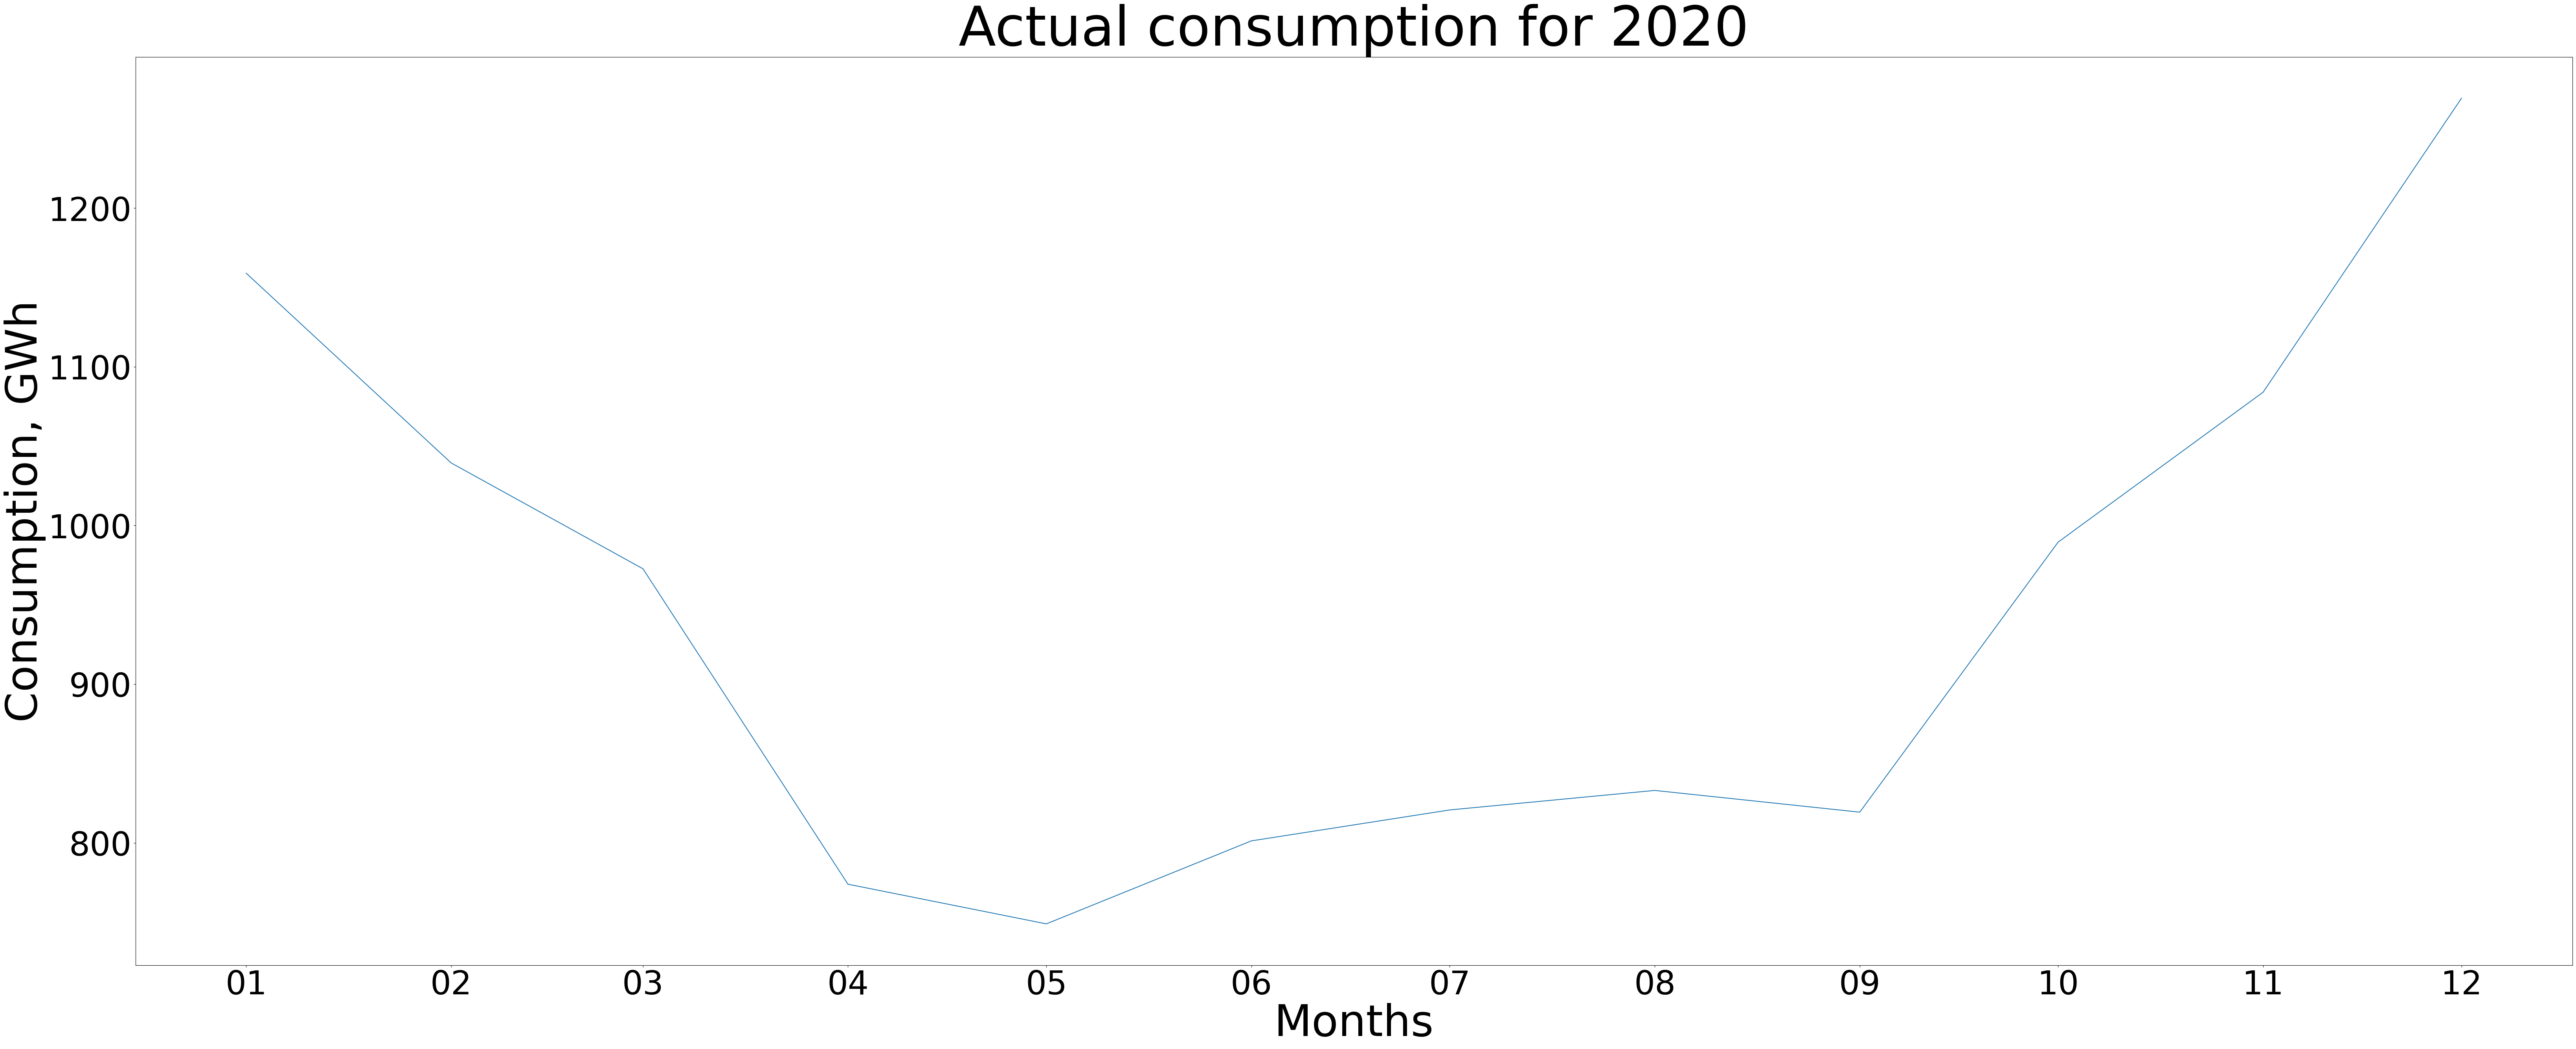

In [36]:
fig, axs = plt.subplots(figsize=(80, 30))

df_2020 = df.loc['2020-01':'2020-12']

axs.plot(df_2020.index, df_2020['consumption'])
axs.set_ylabel('Consumption', fontsize=80)
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

axs.tick_params(axis='both', which='major', labelsize=60)

axs.set_xlabel('Months', fontsize=80)
axs.set_ylabel('Consumption, GWh', fontsize=80)

axs.set_title('Actual consumption for 2020', fontsize=100)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)

plt.show()

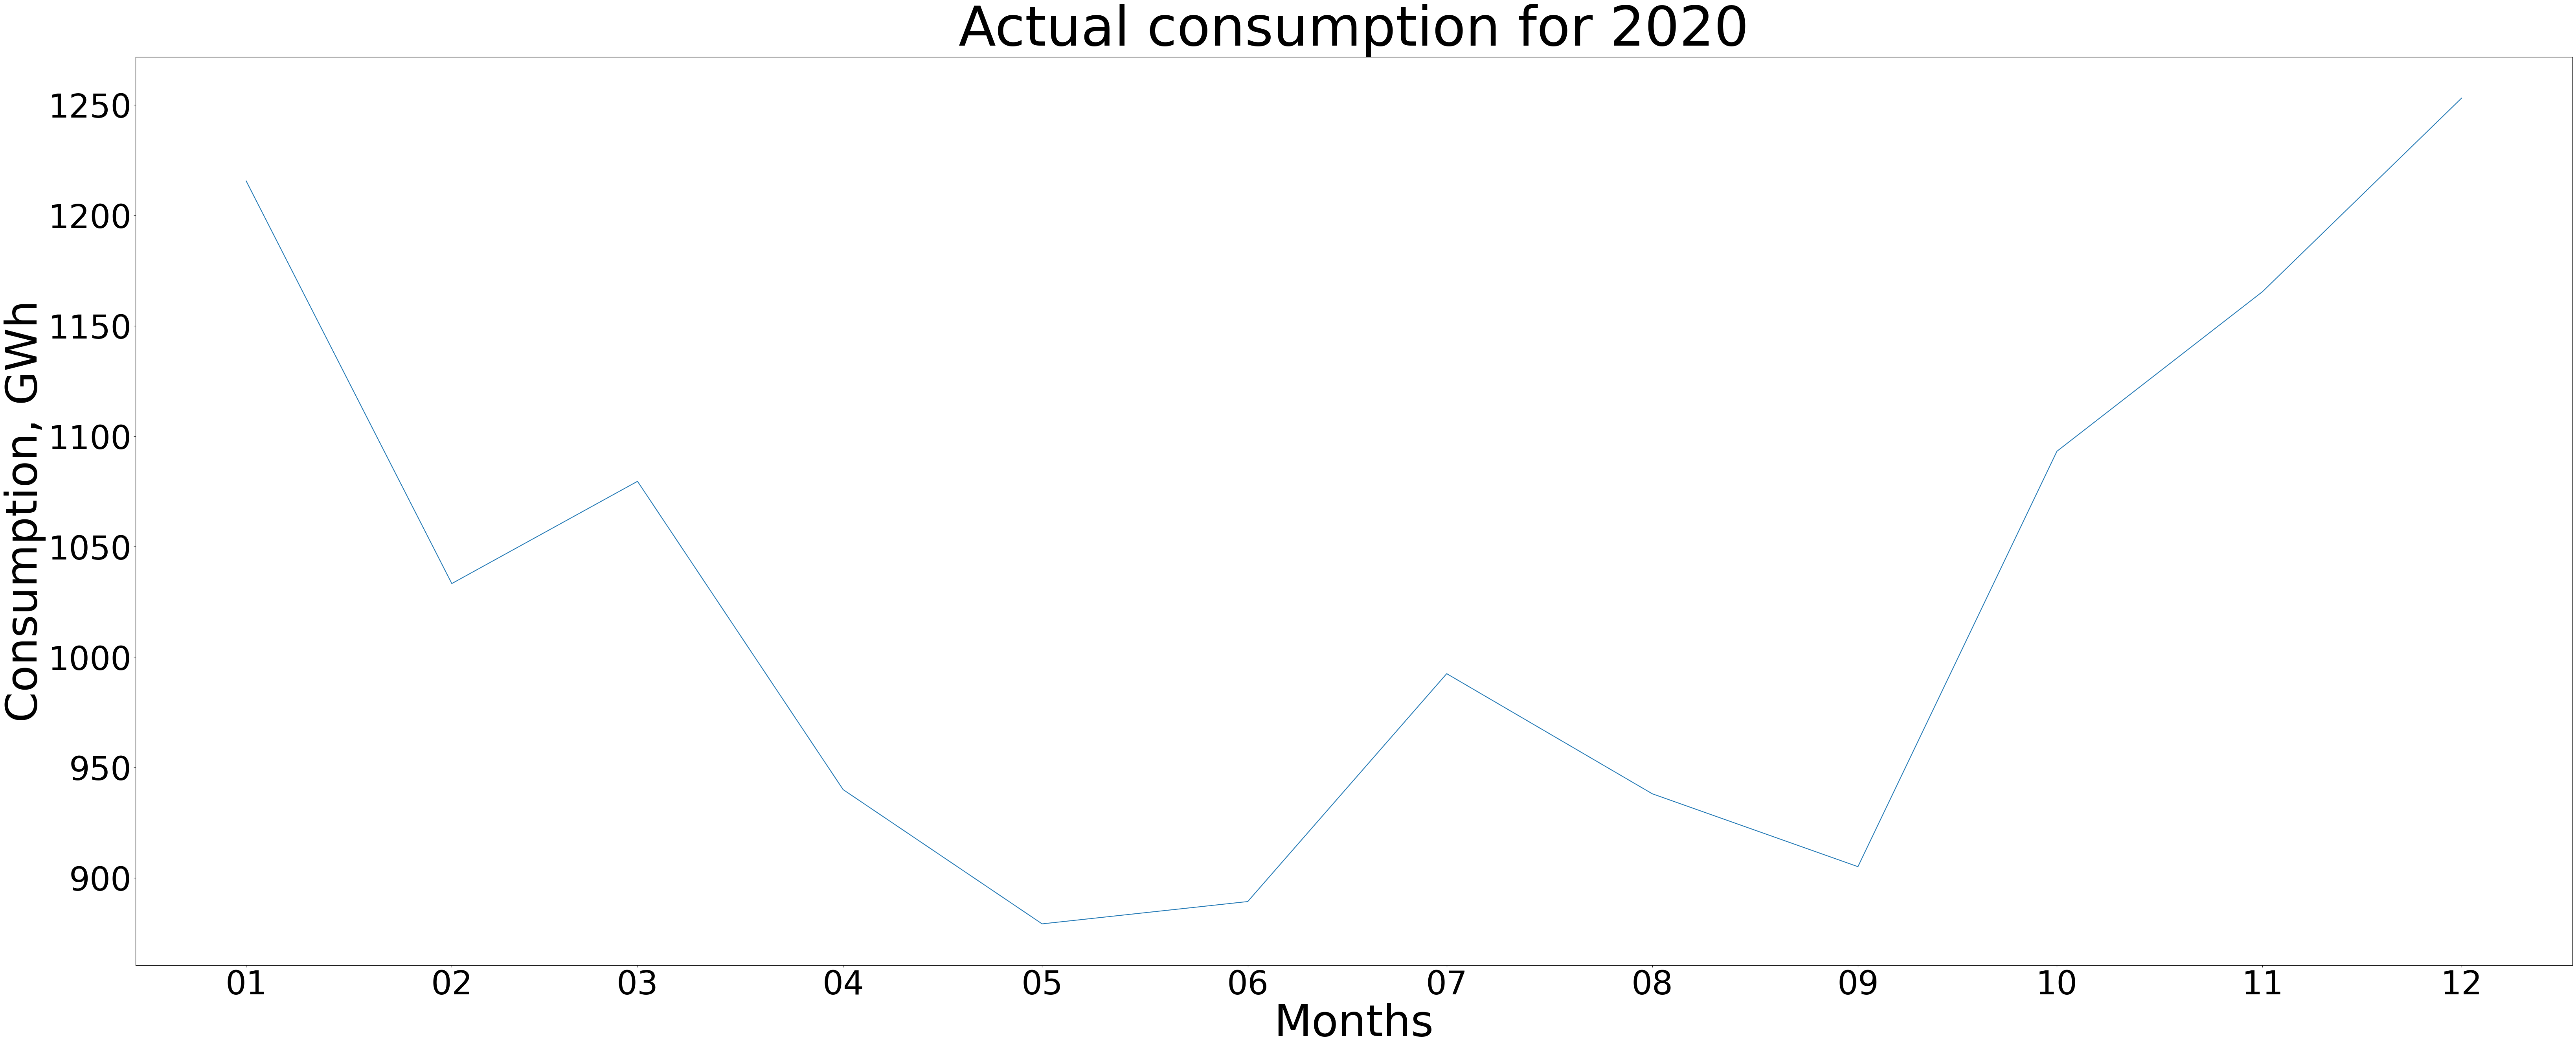

In [41]:
fig, axs = plt.subplots(figsize=(80, 30))

df_2020 = df.loc['2021-01':'2021-12']

axs.plot(df_2020.index, df_2020['consumption'])
axs.set_ylabel('Consumption', fontsize=80)
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

axs.tick_params(axis='both', which='major', labelsize=60)

axs.set_xlabel('Months', fontsize=80)
axs.set_ylabel('Consumption, GWh', fontsize=80)

axs.set_title('Actual consumption for 2020', fontsize=100)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)

plt.show()

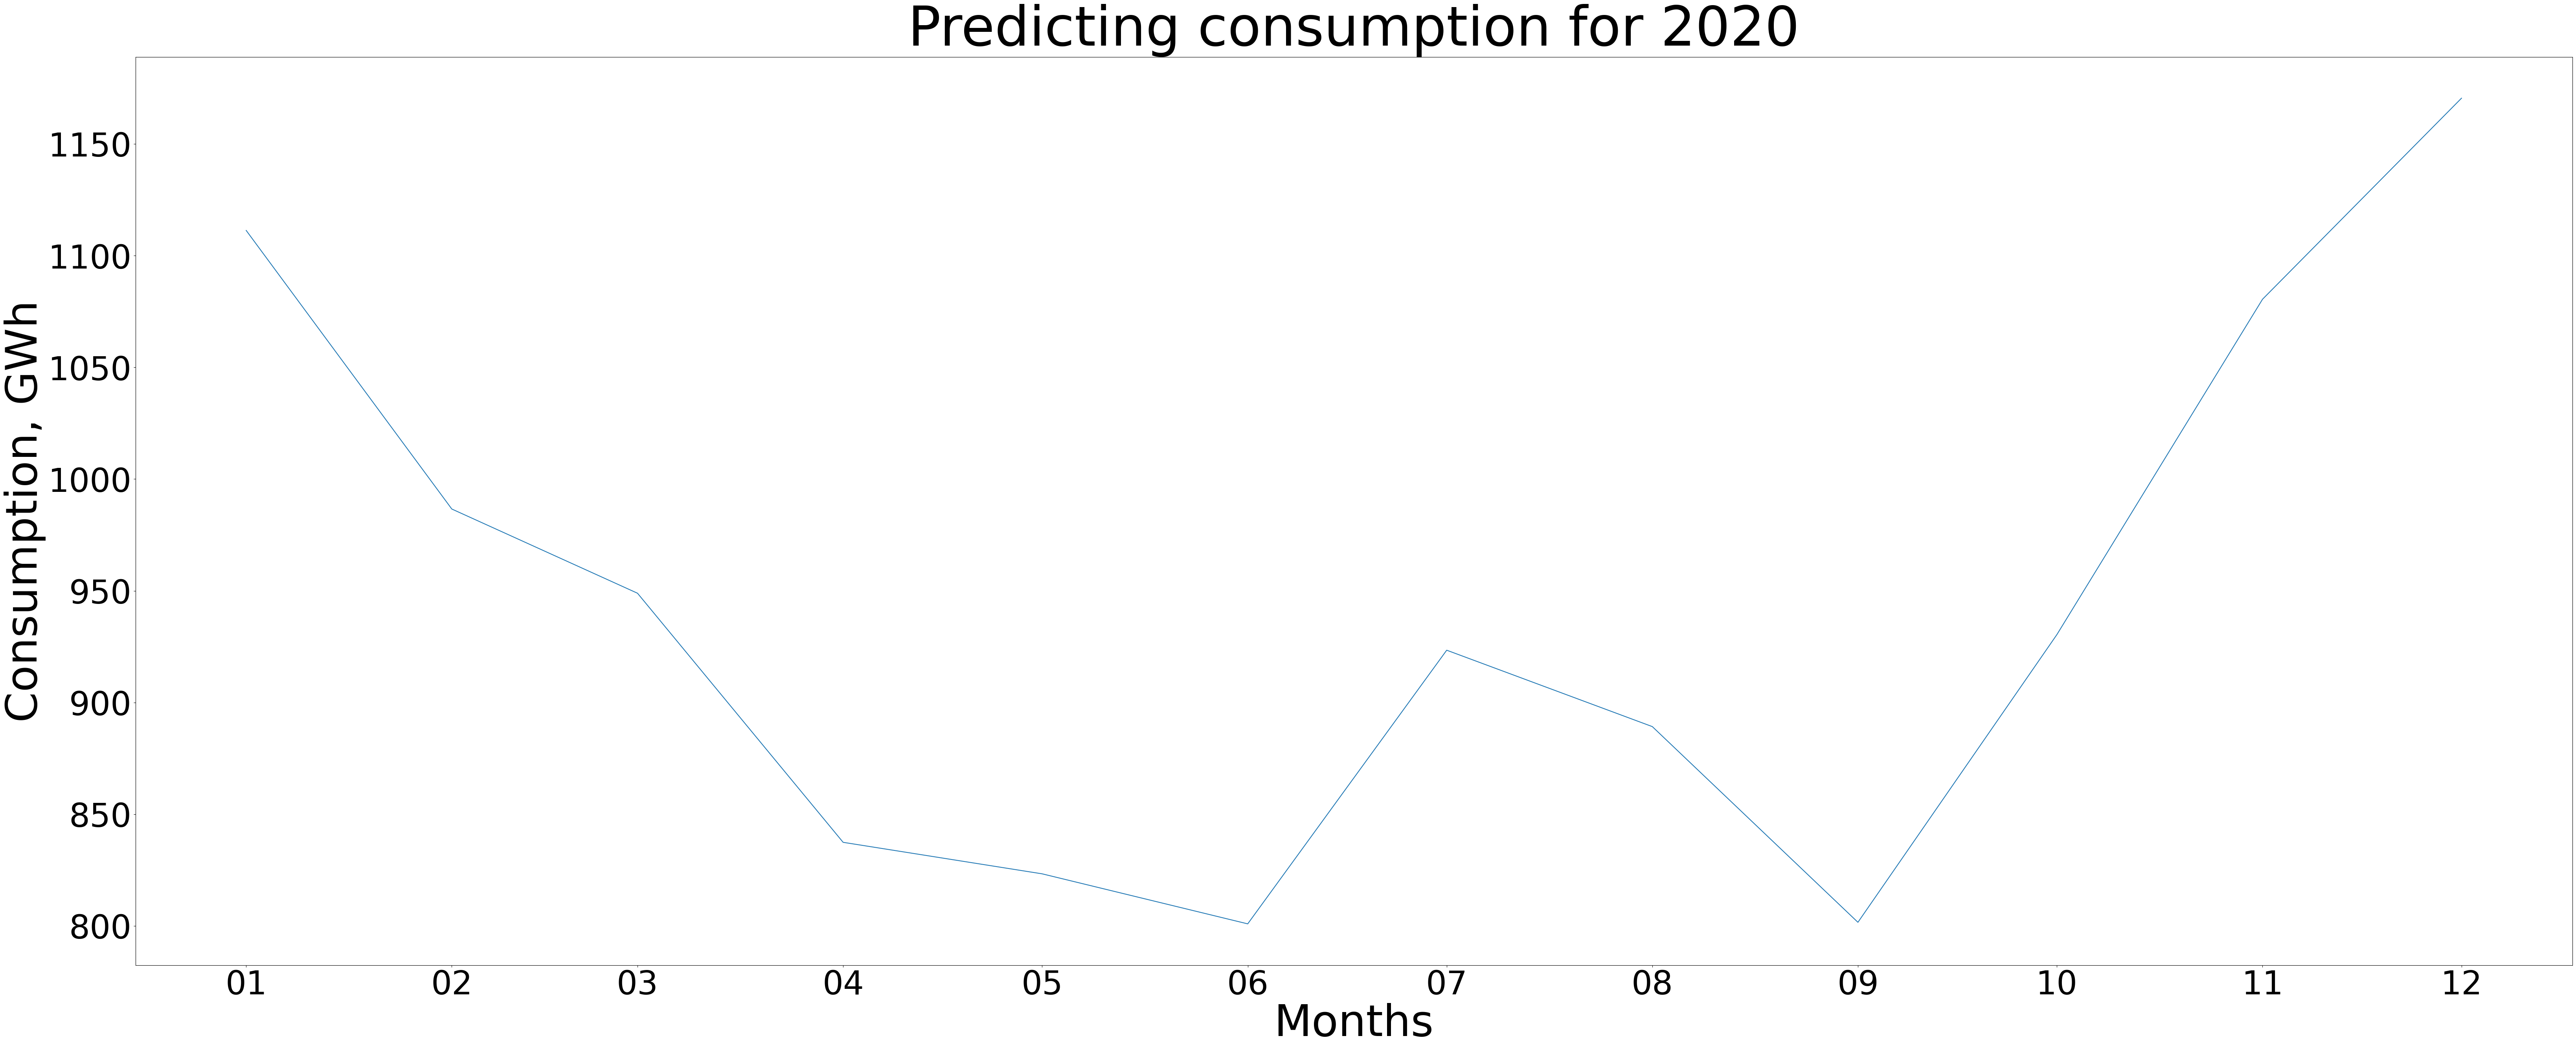

In [43]:
fig, axs = plt.subplots(figsize=(80, 30))

df_2020 = df.loc['2019-01':'2019-12']

axs.plot(df_2020.index, df_2020['consumption'])
axs.set_ylabel('Consumption', fontsize=80)
axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

axs.tick_params(axis='both', which='major', labelsize=60)

axs.set_xlabel('Months', fontsize=80)
axs.set_ylabel('Consumption, GWh', fontsize=80)

axs.set_title('Predicting consumption for 2020', fontsize=100)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)

plt.show()

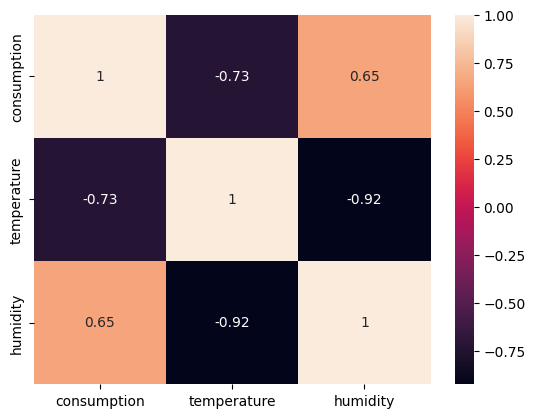

In [18]:
corr_matrix = df.corr()
target_corr = corr_matrix['consumption']
feature_corr = corr_matrix.loc[['temperature', 'humidity'], 'consumption']
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
X = df[['temperature', 'humidity']]
y = df['consumption']

X_train = X.loc['2011-01':'2019-12']
X_test = X.loc['2020-01':'2020-12']
y_train = y.loc['2011-01':'2019-12']
y_test = y.loc['2020-01':'2020-12']

In [7]:
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_linear = linear.predict(X_test)

mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('MAPE: {:.2f}%'.format(mape_linear*100))
print('R2 score:', round(r2_linear, 2))

MAPE: 10.72%
R2 score: 0.45


In [8]:
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mape_lasso  = mean_absolute_percentage_error(y_test, y_pred_lasso)
r2_lasso  = r2_score(y_test, y_pred_lasso)

print('MAPE: {:.2f}%'.format(mape_lasso*100))
print('R2 score: {:.2f}'.format(r2_lasso))

MAPE: 11.22%
R2 score: 0.40


In [9]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mape_ridge  = mean_absolute_percentage_error(y_test, y_pred_ridge)
r2_ridge = ridge.score(X_test, y_test)

print('MAPE: {:.2f}%'.format(mape_ridge*100))
print("R2 score:", r2_ridge)

MAPE: 10.72%
R2 score: 0.4542009223797273


In [10]:
knn = KNeighborsRegressor(n_neighbors=9)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)

r2_knn = r2_score(y_test, y_pred_knn)

print('MAPE: {:.2f}%'.format(mape_knn*100))
print("R2 score:", r2_knn)

MAPE: 10.00%
R2 score: 0.4455561209100788


In [11]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)

r2_tree = r2_score(y_test, y_pred_tree)

print('MAPE: {:.2f}%'.format(mape_tree*100))
print("R2 score:", r2_tree)

MAPE: 7.94%
R2 score: 0.580727962607257


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)

r2_tree = r2_score(y_test, y_pred_tree)

print('MAPE: {:.2f}%'.format(mape_tree*100))
print("R2 score:", r2_tree)

dot_data = export_graphviz(tree_reg, out_file=None, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('decision_tree') 

graph

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)

tree_reg.fit(X, df.tip)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = tree_reg.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)


print('MAPE: {:.2f}%'.format(mape_rf*100))
print("R2 score:", r2_rf)

MAPE: 9.44%
R2 score: 0.5408166682998787


In [ ]:
svr = LinearSVR(random_state=42)

svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

r2_svr = r2_score(y_test, y_pred_svr)

print('MAPE: {:.2f}%'.format(mape_svr*100))
print("R2 score:", r2_svr)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mape_mlp = mean_absolute_percentage_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("MAPE: {:.2f}%".format(mape_mlp*100))
print("R2 score: {:.2f}".format(r2_mlp))

In [15]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

r2_xgb = r2_score(y_test, y_pred_xgb)


print('MAPE: {:.2f}%'.format(mape_xgb*100))
print("R2 score:", r2_xgb)

MAPE: 9.10%
R2 score: 0.4792362487616125


In [16]:
cat_model = CatBoostRegressor(n_estimators=100, random_state=42)

cat_model.fit(X_train, y_train, verbose=False)

y_pred_cat = cat_model.predict(X_test)

mape_cat = mean_absolute_percentage_error(y_test, y_pred_cat)

r2_cat = r2_score(y_test, y_pred_cat)


print('MAPE: {:.2f}%'.format(mape_cat*100))
print("R2 score:", r2_cat)

MAPE: 10.46%
R2 score: 0.41971657673445895
